# Problem statement:

Based on the dataset provided, it appears to contain three columns: "id," "text," and "label." The "text" column seems to contain textual data, possibly reviews or descriptions, and the "label" column contains categories, in this case, 'dogs.'

The dataset contains various textual entries categorized under different labels. We need to develop a model using the Naive Bayes algorithm to classify the text into its appropriate category based on the content. Specifically, focussing on preprocessing the text data, converting it into a suitable format for the Naive Bayes model, training the model, and then evaluating its performance on unseen data. We should to achieve the highest possible accuracy in correctly categorizing the text entries. 

Additionally, we should explore different feature extraction techniques and Naive Bayes variants to understand their impact on the model's performance.

## Data Description

- id - Unique numerical variable (text identifier)
- text - Contains alphanumerica text sentences
- label - contains aphabetical categories for the text data.

#  Implementation using Naives Bayes

### Importing Required Libraries

In [516]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()                                  #data processing
import re                                                   #regular expression for data cleaning
from wordcloud import WordCloud                             #data visualization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #feature extraction
import nltk                                                 #natural language toolkit
from nltk.corpus import stopwords                           #stopwords
from nltk.stem import WordNetLemmatizer                     #text normalization
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

### **Load the data**

In [517]:
input_data = pd.read_csv('lNlhedMcSH63Idvr6lzE_valid.csv')
input_data.head()

,id,text,label
0,0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it",dogs
1,1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is ve...,dogs
2,2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortioni...,dogs
3,3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would ap...,dogs
4,4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I w...",dogs


In [518]:
#separate features and target variable
x = input_data.drop(['id', 'label'], axis=1)
y= input_data['label']

#### Data Information

In [519]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15499 entries, 0 to 15498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15499 non-null  int64 
 1   text    15499 non-null  object
 2   label   15499 non-null  object
dtypes: int64(1), object(2)
memory usage: 363.4+ KB


### **Data Pre-processing**

In [520]:
### checking for Null vallues

input_data.isnull().sum()

id       0
text     0
label    0
dtype: int64

#### Target Exploration

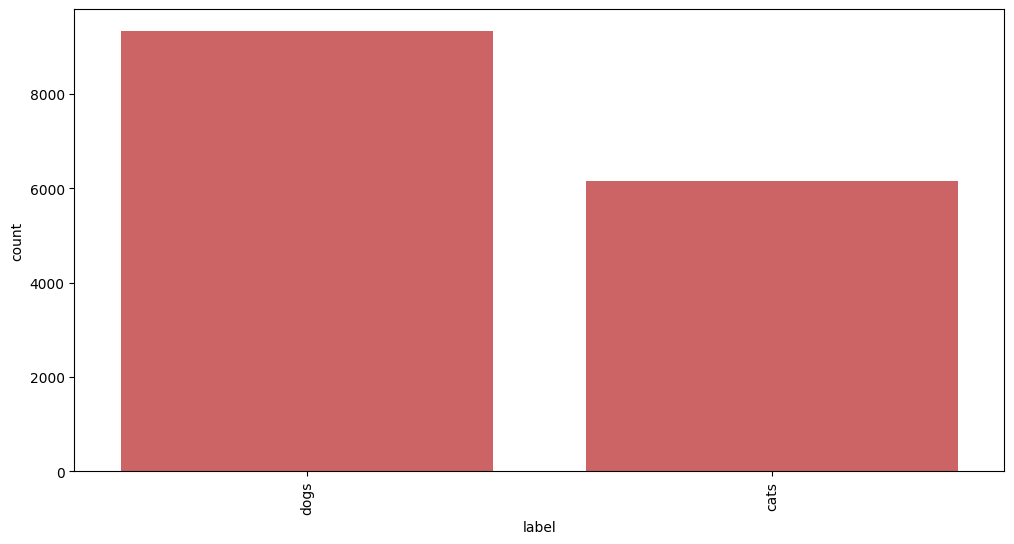

In [521]:
### Data Pre-processing
cnt_tag = y.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_tag, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

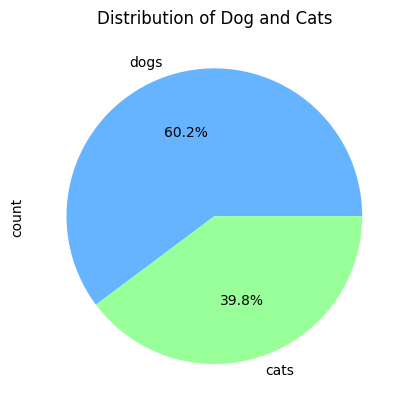

In [522]:
# EDA 1: Distribution of Classes
class_distribution = y.value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Dog and Cats')
plt.show()

In [523]:
# lets understand the proportion of the above distribution
y.value_counts(normalize=True)

label
dogs    0.602168
cats    0.397832
Name: proportion, dtype: float64

##### **Insights:**
- We can infer that the given problem is a class imbalance problem.

#### Understanding the Word Count in the Text Data

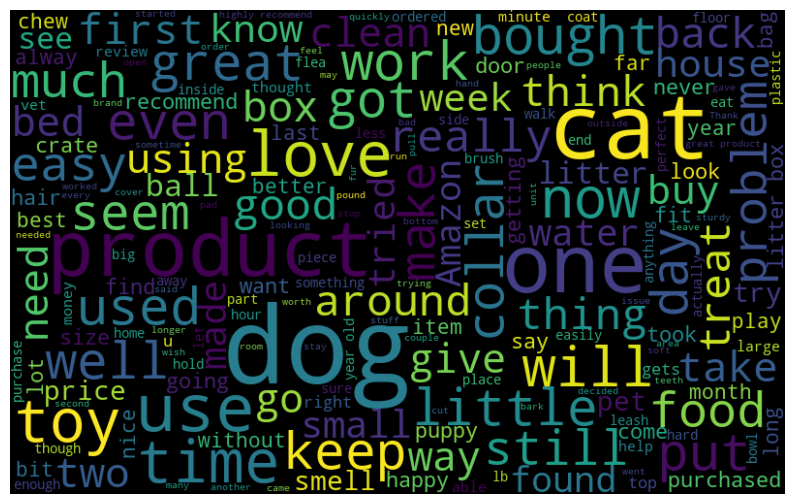

In [524]:
all_words = ' '.join([text for text in x['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### **Insights:**
- The frequency of words in the text data seem to be implying the category to which it  belongs. Its possible the text data could belong to multiple categories but in the actual data only one of the two categories i.e. either **dog** or **cat** is assigned. This seems to be a Binary Class Classification problem.

### **Data Cleaning**

In [525]:
#### Lets take a peak inside the data
x

,text
0,"We started giving this to my 5 year old Labrador retriever (female) she has arthritis problems along with weakness in her back legs and it seems to help a little bit, would not hurt to try it"
1,This product is easy to set up and use. I have a new puppy Border Collie who will be fullgrown around 50#. The crate would still have lots of room for her. I purchased this thru Amazon which is ve...
2,my dog has nerves and wants to itch and chew......the cone keeps him from a frenzy somewhat! If not for the cone he would go to town on his entire body drawing blood....however he is a contortioni...
3,the breeded gave us a can of Nupro when we took our scottie home...having fed it to him now for 4 months we are very pleased with the results...those who want a great coat on their animal would ap...
4,"Very study, well made poop bag. Easy to open and holds the poop with no leaking, but I only gave it four stars because it does not keep the smell inside the bag. That is the only downside, but I w..."
...,...
15494,My dog loves these!! They soft and easy to break into smaller pieces. They were a great buy at $16!
15495,"My 7 month old rescue pup had parvo before I adopted him, so he has a very sensitive stomach... these tendons don't mess with him at all. I'm a bartender, and our nightly ritual when I get home at..."
15496,"Overall I had no problem cutting my cat's nails with this trimmer, but after owning it for only 4 months the thing simply disintegrated in my hands! I literally just picked it up and was preparing..."
15497,We searched everywhere for something to keep our chew happy 1 year old German Shorthair occupied. The Kong only held up for a few weeks and never held enough treats to keep him entertained for mor...


#### Lets remove the Unwanted Characters

In [526]:
def clean_url(x):
    x["text"] = x["text"].str.replace("/", " ") # removing "/" form strings in the dataframe x.
    x["text"] = x["text"].str.replace("'", "") # contraction mapping - removing "'" from strings and expanding the words
    x['text'] = x['text'].apply(lambda x: re.sub("@[A-Za-z0-9]+", "", x))  # removing @ from strings
    x['text'] = x['text'].apply(lambda x: re.sub("#","", x))  # removing # from strings
    x['text'] = x['text'].apply(lambda x: re.sub("!","", x))  # removing # from strings
    x['text'] = x['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))  # removing numbers from the strings

    return x

In [527]:
x = clean_url(x)

In [528]:
x

,text
0,We started giving this to my year old Labrador retriever female she has arthritis problems along with weakness in her back legs and it seems to help a little bit would not hurt to try it
1,This product is easy to set up and use I have a new puppy Border Collie who will be fullgrown around The crate would still have lots of room for her I purchased this thru Amazon which is ver...
2,my dog has nerves and wants to itch and chew the cone keeps him from a frenzy somewhat If not for the cone he would go to town on his entire body drawing blood however he is a contortionis...
3,the breeded gave us a can of Nupro when we took our scottie home having fed it to him now for months we are very pleased with the results those who want a great coat on their animal would ap...
4,Very study well made poop bag Easy to open and holds the poop with no leaking but I only gave it four stars because it does not keep the smell inside the bag That is the only downside but I w...
...,...
15494,My dog loves these They soft and easy to break into smaller pieces They were a great buy at
15495,My month old rescue pup had parvo before I adopted him so he has a very sensitive stomach these tendons dont mess with him at all Im a bartender and our nightly ritual when I get home at ...
15496,Overall I had no problem cutting my cats nails with this trimmer but after owning it for only months the thing simply disintegrated in my hands I literally just picked it up and was preparing t...
15497,We searched everywhere for something to keep our chew happy year old German Shorthair occupied The Kong only held up for a few weeks and never held enough treats to keep him entertained for mor...


#### Removal of Stop Words (such as “the”, “a”, “an”, “in”)

In [529]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roday\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Text Normalization using Lemmatization

- Lemmatization is the process of converting the words of a sentence to its dictionary form.
- For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse.

In [530]:
nltk.download('wordnet')
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roday\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [531]:
lemmatizer = WordNetLemmatizer()

def text_lemmatizer(x):
    new_sentence =''
    for i in x.split():
        new_sentence=new_sentence+lemmatizer.lemmatize(i.lower())+' '
    return new_sentence

In [532]:
x['text'] = x['text'].apply(lambda x: text_lemmatizer(x))

In [533]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

#### Combined Text Cleaner

In [534]:
def text_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) #contraction mapping
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words to lemma                               
    return newString.strip() 

In [535]:
x['text'] = x['text'].apply(lambda x: text_cleaner(x))

In [536]:
x.head()

,text
0,started giving year old labrador retriever female ha arthritis problem along weakness back leg seems help little bit would hurt try
1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost wa cheaper local pet store...
2,dog ha nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case c...
3,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend
4,study well made poop bag easy open hold poop leaking gave four star doe keep smell inside bag downside keep buying convenient affordable


#### Contraction Mapping

In [537]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [538]:
x['text'] = x['text'].apply(lambda x: ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in x.split(" ")]))

In [539]:
x_contraction_mapped = x['text'].copy()

In [540]:
x.head()

,text
0,started giving year old labrador retriever female ha arthritis problem along weakness back leg seems help little bit would hurt try
1,product easy set use new puppy border collie fullgrown around crate would still lot room purchased thru amazon convienience delivery person carried right door total cost wa cheaper local pet store...
2,dog ha nerve want itch chew cone keep frenzy somewhat cone would go town entire body drawing blood however contortionist maneuver cone picture show black band around diameter large end cone case c...
3,breeded gave u nupro took scottie home fed month pleased result want great coat animal would appreciate supplement would definitely recommend
4,study well made poop bag easy open hold poop leaking gave four star doe keep smell inside bag downside keep buying convenient affordable


### **Data Visualization**

#### Data Visualization - Original Text

##### Most Commonly Used Words

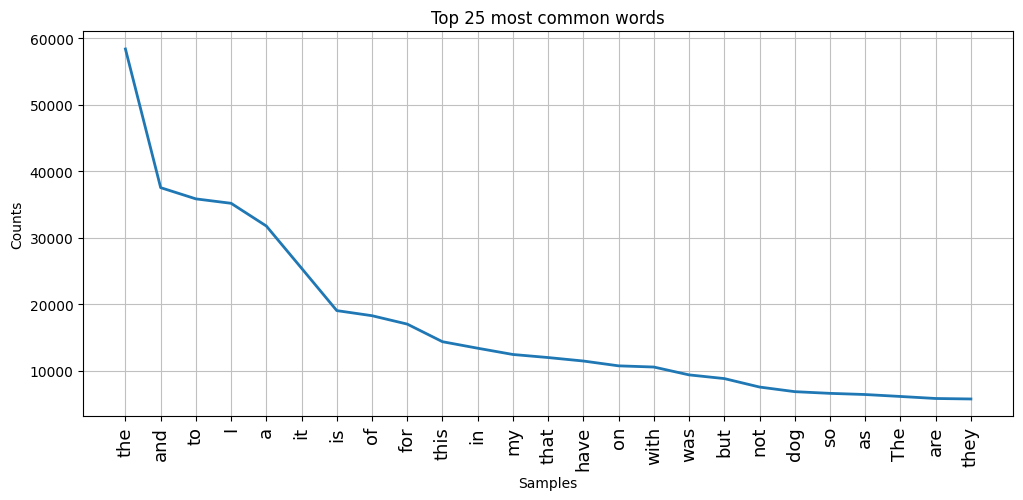

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [541]:
all_words = []
for line in list(input_data['text']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

#### Data Visualization - Cleaned Text

##### Most Commonly Used Words Using Cleaned Data

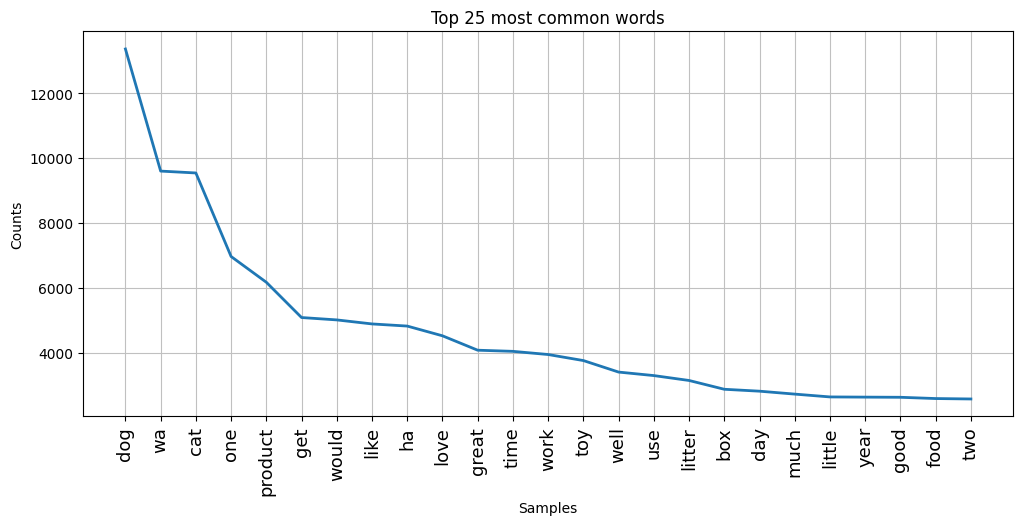

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [542]:
all_words = []
for line in list(x['text']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

##### **Insights:**
- From above we clearly see that the data cleaning helped surface the top most popular meaningful words in the text. And the "dog" and "cat" are among the top three categories.

### **Model Building**

#### Feature Extraction using TFIDF.
- TF-IDF is the score of every word in vocabulary is calculated and used to build the feature space

In [543]:
vectorizer = TfidfVectorizer() 
features = vectorizer.fit_transform(x['text'])
features.shape

(15499, 20893)

#### Extracted Feature Names

In [544]:
vectorizer.get_feature_names_out() 

array(['aa', 'aaa', 'aaaand', ..., 'zukes', 'zymox', 'zyrtec'],
      dtype=object)

#### Feature Extraction using Count Vectorizer

In [545]:
# Word and character BOW on URLs
vec_bow = CountVectorizer(ngram_range=(1, 3), min_df=400)
vec_bow.fit(x['text'])
text_bow = vec_bow.transform(x['text'])

vec_bow.get_feature_names_out()

array(['able', 'absolutely', 'actually', 'ago', 'almost', 'also',
       'always', 'amazon', 'amount', 'another', 'anyone', 'anything',
       'area', 'around', 'away', 'back', 'bad', 'bag', 'ball', 'bed',
       'best', 'better', 'big', 'bit', 'bottom', 'bought', 'bowl', 'box',
       'brand', 'brush', 'buy', 'buying', 'came', 'cant', 'cat',
       'cat love', 'chew', 'clean', 'cleaning', 'coat', 'collar', 'come',
       'could', 'couple', 'cover', 'crate', 'day', 'decided',
       'definitely', 'didnt', 'different', 'doe', 'doesnt', 'dog',
       'dog love', 'dont', 'door', 'dry', 'durable', 'easily', 'easy',
       'eat', 'end', 'enough', 'especially', 'even', 'ever', 'every',
       'expensive', 'extra', 'far', 'favorite', 'feel', 'find', 'fine',
       'first', 'fit', 'flea', 'floor', 'food', 'found', 'free', 'friend',
       'front', 'fur', 'gave', 'get', 'getting', 'give', 'go', 'going',
       'good', 'got', 'great', 'great product', 'ha', 'hair', 'half',
       'hand', 'happy'

### Create train and test sets

In [546]:
#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=56)

#### Training  a Logistic Regression

In [547]:
lr = LogisticRegression()           #instantiate model
lr.fit(x_train, y_train)          #training model



LogisticRegression()

#### Evaluating the Logistic Regression Model Performance

In [548]:
prediction = lr.predict(x_test) #predicting on validation set
f1_score(y_test, prediction, pos_label="dogs")        #calculating f1 score for predicting dogs

0.8705647176411794

In [549]:
prediction = lr.predict(x_test) #predicting on validation set
f1_score(y_test, prediction, pos_label="cats")        #calculating f1 score for predicting cats

0.7643312101910829

### Implement Gaussian Naive Bayes

##### Initializing the Gaussian Naive Bayes

In [550]:
## Initialize Gaussian Naives Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes_guassian = GaussianNB()

#####  Create Train and Test Sets using the TFIDF

In [551]:
#create train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=56)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((10849, 20893), (10849,)), ((4650, 20893), (4650,)))

In [559]:
#train the model and make predictions
naive_bayes_guassian.fit(x_train, y_train, sample_weight=None)

GaussianNB()

## Multinomial Naive Bayes

In [407]:
y

0        dogs
1        dogs
2        dogs
3        dogs
4        dogs
         ... 
15494    dogs
15495    dogs
15496    cats
15497    dogs
15498    cats
Name: label, Length: 15499, dtype: object

##### For Multinomial Naive Bayes Model we need the target variable in binary form. Let convert the dogs to 1 and cats to 0.

In [408]:
# create a dict to convert the dogs and cats to 1 and 0 respectively

y_dict = {'dogs':1, 'cats':0}

# Map the dictionary variable to the y dataframe
y = y.map(y_dict)

In [409]:
y.shape

(15499,)

### Implement Multinomial Naive Bayes

In [431]:
from sklearn.naive_bayes import MultinomialNB

We need to specify some of the Hyperparameters of MNB which are discussed below:

- alpha: It is the Laplace smoothing parameter which is used to avoid zero probabilities in cases where a feature doesn’t occur in a particular class in the training data. A higher value of alpha results in less aggressive smoothing which allows the model to be more sensitive to the training data.
- fit_prior: This is a Boolean parameter (True/False) which determines whether to learn class prior probabilities or not. We will set it to ‘True’ so that it assumes uniform prior probabilities for classes.
- force_alpha: This is also a Boolean parameter (True/False) which forces the alpha to be added to the sample counts and smoothed if it is set to ‘True’.

Ref Source:GeekforGeeks

In [473]:
naive_bayes_multinomial = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)

In [450]:
# examine the vocabulary and document-term matrix together
x_data = pd.DataFrame(text_bow.toarray(), columns=vec_bow.get_feature_names_out())
x_data

,able,absolutely,actually,ago,almost,also,always,amazon,amount,another,...,work well,worked,working,worth,would,would recommend,wouldnt,year,year old,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15495,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15497,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


#### Create train and test sets

In [553]:

#create train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state=56)

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((10849, 274), (10849,)), ((4650, 274), (4650,)))

In [452]:
y_test_n = y_test[:274]

In [554]:
#train model and make predictions
naive_bayes_multinomial.fit(x_train, y_train)
predictions = naive_bayes_multinomial.predict([y_test_n])
predictions

array(['dogs'], dtype='<U4')

# Bernoulli Naive Bayes

### Implement Bernoulli Naive Bayes

In [561]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_burnoulli = BernoulliNB()

In [563]:
naive_bayes_burnoulli.fit(x_train, y_train)

### Evaluate the Multinomial, Guassinan and Burnoulli Naive Bayes Models

In [566]:
# Evaluate the models using accuracy and F1-score
y_pred_mnb = naive_bayes_multinomial.predict(x_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, pos_label='dogs')
 
y_pred_gnb = naive_bayes_guassian.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='dogs')

y_pred_burn = naive_bayes_burnoulli.predict(x_test)
accuracy_burn = accuracy_score(y_test, y_pred_burn)
f1_burn = f1_score(y_test, y_pred_burn, pos_label='dogs')
 
# Print the results
print("Multinomial Naive Bayes - Accuracy:", accuracy_mnb)
print("Multinomial Naive Bayes - F1-score for 'dog' class:", f1_mnb)
 
print("Gaussian Naive Bayes - Accuracy:", accuracy_gnb)
print("Gaussian Naive Bayes - F1-score for 'dog' class:", f1_gnb)

print("Burnoulli Naive Bayes - Accuracy:", accuracy_burn)
print("Burnoulli Naive Bayes - F1-score for 'dog' class:", f1_burn)

Multinomial Naive Bayes - Accuracy: 0.8075268817204301
Multinomial Naive Bayes - F1-score for 'dog' class: 0.84858737946202
Gaussian Naive Bayes - Accuracy: 0.7148387096774194
Gaussian Naive Bayes - F1-score for 'dog' class: 0.7840390879478827
Burnoulli Naive Bayes - Accuracy: 0.7776344086021505
Burnoulli Naive Bayes - F1-score for 'dog' class: 0.8253968253968254


#### Plotting the Evaluation Metrics of Accuracy and F1-Scores for Naive Bayes Models

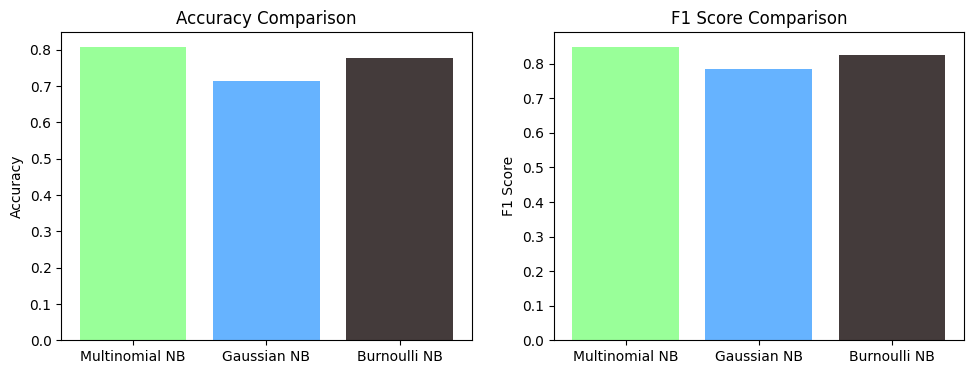

In [584]:
methods = ['Multinomial NB', 'Gaussian NB', 'Burnoulli NB' ]
accuracy_scores = [accuracy_mnb, accuracy_gnb, accuracy_burn]
f1_scores = [f1_mnb, f1_gnb, f1_burn]
 
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.bar(methods, accuracy_scores, color=['#99ff99','#66b3ff', '#443b3b'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
 
plt.subplot(1, 3, 2)
plt.bar(methods, f1_scores, color=['#99ff99','#66b3ff', '#443b3b'])
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
 
plt.show()

##### **Insights:**

- **The Multinomial Naive Bias Performed best** as compared to the Guassian NB and Burnoulli NB with Accuracy: 0.8075268817204301 and F1-score for 'dog' class: 0.84858737946202.
- For this dataset Burnoulli Naive Bayes Model seems to perform the second best with Accuracy: 0.7776344086021505 which are comparatively much lower than the Multinomial NB and F1-score for 'dog' class: 0.8253968253968254.